#Исследовательский анализ данных

###1.Загрузка датасета с помощью библиотеки pandas
Через код происходит обращение к локальной библиотеке файлов и, выбрав файл salary.csv, происходит загрузка файла.

In [ ]:
import pandas as pd   # импорт библиотеки pandas
from google.colab import files # импорт класса files

# создание объекта files и применение к нему метода для запроса загрузки файла
uplouded = files.upload()

Saving salary2.csv to salary2.csv


Чтение данных из файла .csv

In [ ]:
import pandas as pd      # импорт библиотеки
df = pd.read_csv('/content/salary2.csv', sep=';') # чтение таблицы

###2.Предварительная обработка данных

####2.1 Обзор данных и описание предметной области датасета


По варианту дан датасет, котрый содержит в себе информацию о зарплатах. Таблица включает в себя следующую информацию:
1. Год выплаты заработной платы (целое число)
2. Тип работы (PT - Part-time, FT - Full-time,  FL-Freelance)
3. Должность
4. Зарплата за год (целое число)
5. Зарплата в долларах (целое число)
6. Страна проживания
7. Страна главного офиса
8. Среднее кол-во людей в компании (S - менее 50 сотрудников (малая), M от 50 до 250 сотрудников (средняя), L - более 250 сотрудников (крупная))
9. Общий опыт работы
10. Опыт на последней работе

In [ ]:
df.dtypes

work_year             float64
employment_type        object
job_title              object
salary                float64
salary_in_usd         float64
employee_residence     object
company_location       object
company_size           object
exp_all                 int64
exp                     int64
dtype: object

In [ ]:
df.shape

(401, 10)

In [ ]:
df.head()

,work_year,employment_type,job_title,salary,salary_in_usd,employee_residence,company_location,company_size,exp_all,exp
0,2020.0,FT,Data SCIENTIST,70000.0,79833.0,DE,DE,L,9,4
1,2020.0,FT,Product Data Analyst,20000.0,20000.0,HN,HN,S,2,2
2,2020.0,FT,Data Analyst,72000.0,72000.0,US,US,L,13,3
3,2020.0,FT,Data Scientist,11000000.0,35735.0,HU,HU,L,60,6
4,2020.0,FT,Data Scientist,45000.0,51321.0,FR,FR,S,8,4


На основе выведенной информации о колонках, их типах и первых пяти строках записей датасета можно сказать, что представленные данные позволяют анализировать зарплаты различных специалистов в различных компаниях и получать данные основанные на их предыдущем опыте.

####2.2.Оценка числовых столбцов

In [ ]:
df.describe() #получение основных статистических данных

,work_year,salary,salary_in_usd,exp_all,exp
count,401.000000,3.980000e+02,401.000000,401.000000,401.000000
mean,2021.528678,2.888336e+05,105895.017456,17.197007,4.486284
std,0.678086,1.677081e+06,58183.664171,11.133445,2.027421
min,2020.000000,4.000000e+03,2859.000000,0.000000,-1.000000
25%,2021.000000,6.700000e+04,65013.000000,10.000000,3.000000
50%,2022.000000,1.091400e+05,100000.000000,15.000000,4.000000
75%,2022.000000,1.500000e+05,140000.000000,22.000000,6.000000
max,2022.000000,3.040000e+07,412000.000000,81.000000,10.000000


- count - количество непустых строк;
- mean - среднее арифметическое значение;
- std - стандартное отклонение;
- min - минимальное значение;
- 25% - 25 персентиль, говорит о значении, которое больше 25% остальных значений;
- 50% - 50 персентиль (медиана), говорит о значении, которое больше 50% процентов остальных значений;
- 75% - 75 персентиль - число, которое больше чем, 75% остальных чисел.

Данные столбца "work_year" не несут информации для анализа.

Исходя из полученных статистических данных можно сказать, что в столбце "exp" обнаружены значения меньше 0, которые противоречат тому, что опыт не может быть отрицательным. Также можно вывести средние, максимальные и минимальные значения зарплат и опыта работы.

####2.3.Выявление проблем с названиями колонок и исправление, если они есть

In [ ]:
df.columns #вывод названий столбцов

Index(['work_year', 'employment_type', 'job_title', 'salary', 'salary_in_usd',
       'employee_residence', 'company_location', 'company_size', 'exp_all',
       'exp'],
      dtype='object')

По варианту дан датасет, котрый содержит в себе информацию о зарплатах. Таблица включает в себя следующую информацию:
1. Год выплаты заработной платы (целое число)
2. Тип работы (PT - Part-time, FT - Full-time,  FL-Freelance)
3. Должность
4. Зарплата за год (целое число)
5. Зарплата в долларах (целое число)
6. Страна проживания
7. Страна главного офиса
8. Среднее кол-во людей в компании (S - менее 50
сотрудников (малая), M от 50 до 250 сотрудников (средняя), L - более 250 сотрудников (крупная))
9. Общий опыт работы
10. Опыт на последней работе

Проблемы с названиями:
Название первого столбца "work_year"(рабочий год) дает не правильное понимание содержащихся в нем данных. Для корректного представления о содержимом данного столбца его нужно переименовать в "salary_payment_year".
Для более точного понимания данных о зарплате за год столбец "salary" нужно переименовать в "year_salary".
Для более точного понимания, что указан опыт именно на последней работе, колонку "exp" нужно переименовать в "last_job_exp".

Для исправления проблем с названиями они изменяются при помощи применения метода rename к датасету.

In [ ]:
df.rename(columns={'work_year': 'salary_payment_year'}, inplace=True)
df.rename(columns={'salary': 'year_salary'}, inplace=True)
df.rename(columns={'exp': 'last_job_exp'}, inplace=True)

Проверка исправлений:

In [ ]:
df.columns

Index(['salary_payment_year', 'employment_type', 'job_title', 'year_salary',
       'salary_in_usd', 'employee_residence', 'company_location',
       'company_size', 'exp_all', 'last_job_exp'],
      dtype='object')

Теперь все названия столбцов соответствуют содержащимся в них данным.

####2.4.Выявление и устранение пропусков при наличии

In [ ]:
df.isna().sum() #подсчет количества пропусков

salary_payment_year    0
employment_type        0
job_title              0
year_salary            3
salary_in_usd          0
employee_residence     0
company_location       0
company_size           0
exp_all                0
last_job_exp           0
dtype: int64

Так как пропуски выявлены в колонке "year_salary", их нужно устранить.

В качестве исправления строк с отсутствующей годовой зарплатой было выбрано заполнение данными в качестве способа обработки пропусков. Так как значение количественное, значение для заполнения - медиана (109140).

In [ ]:
df['year_salary'] = df['year_salary'].fillna(109140)

Для проверки корректности выполнения метода заполнения пропусков снова производится подсчет их количества.

In [ ]:
df.isna().sum()

salary_payment_year    0
employment_type        0
job_title              0
year_salary            0
salary_in_usd          0
employee_residence     0
company_location       0
company_size           0
exp_all                0
last_job_exp           0
dtype: int64

Так как все значения равны нулю, заполнение пропусков выполнилось успешно.

####2.5.Проверка на наличие явных и неявных дубликатов данных и их удаление при наличии
**Выявление явных дубликатов данных:**

In [ ]:
df.duplicated().sum() # подсчет количества дубликатов

0

Так как дубликаты не выявлены, их удаление не требуется.

**Выявление неявных дубликатов данных:**

Выявление требуется произвести для текстовых колонок "employment_type", "job_title", "employee_residence", "company_location", "company_size".

In [ ]:
print(df['employment_type'].unique()) # Поиск уникальных значений в столбце "employment_type"

['FT' 'PT' 'FL']


In [ ]:
print(df['job_title'].unique()) # Поиск уникальных значений в столбце "job_title"

['Data SCIENTIST' 'Product Data Analyst' 'Data Analyst' 'Data Scientist'
 'Data Engineer' 'Machine Learning Manager' 'Data Analytics Engineer'
 'Data Science Engineer' 'Machine Learning Developer'
 'Data Analytics Manager' 'Head of Data Science'
 'Head of Machine Learning' 'NLP Engineer' 'Data Analytics Lead'
 'DataScientist' 'Data AnalyticsManager']


In [ ]:
print(df['employee_residence'].unique()) # Поиск уникальных значений в столбце "employee_residence"

['DE' 'HN' 'US' 'HU' 'FR' 'IN' 'PK' 'JP' 'GR' 'MX' 'CA' 'AT' 'NG' 'PH'
 'GB' 'ES' 'IT' 'PL' 'BG' 'NL' 'IQ' 'UA' 'SG' 'RU' 'MT' 'CL' 'RO' 'IR'
 'VN' 'BR' 'HK' 'TR' 'RS' 'AR' 'DZ' 'AU' 'CH']


In [ ]:
print(df['company_location'].unique()) # Поиск уникальных значений в столбце "company_location"

['DE' 'HN' 'US' 'HU' 'FR' 'IN' 'PK' 'JP' 'GR' 'MX' 'CA' 'AT' 'NG' 'GB'
 'ES' 'IT' 'LU' 'PL' 'NL' 'IQ' 'UA' 'IL' 'RU' 'MT' 'CL' 'IR' 'BR' 'VN'
 'TR' 'DZ' 'MY' 'AU' 'CH']


In [ ]:
print(df['company_size'].unique()) # Поиск уникальных значений в столбце "company_size"

['L' 'S' 'M' 'Large']


Дубликат выявлен только в колонке "company_size". "L" и "Large" это одно и тоже только в полном и сокращенном вариантах, поэтому требуется заменить полную версию на сокращенную.

In [ ]:
df['company_size'].replace('Large', 'L', inplace=True)  # замена Large на L

В качестве проверки замены данных проводится повторный поиск уникальных значений для колонки "company_size".

In [ ]:
print(df['company_size'].unique()) # Поиск уникальных значений в столбце "company_size"

['L' 'S' 'M']


Замена дубликата прошла успешно.

####2.6.Проверка типов данных и исправление при необходимости

In [ ]:
df.dtypes

salary_payment_year    float64
employment_type         object
job_title               object
year_salary            float64
salary_in_usd          float64
employee_residence      object
company_location        object
company_size            object
exp_all                  int64
last_job_exp             int64
dtype: object

Так как год - это целое число, требуется изменение типа с float64 на int64.

In [ ]:
df['salary_payment_year'] = df['salary_payment_year'].astype('int')

Для проверки изменения типа для года выдачи зарплаты метод dtype вызывается только для измененного столбца.

In [ ]:
df['salary_payment_year'].dtype

dtype('int64')

Так как тип колонки теперь int, изменение прошло успешно.

####2.7.Исправление данных колонки "last_job_exp"
Ранее было выявлено наличие данных, которые меньше нуля, что требует исправления на 0, так как отрицательного опыта работы быть не может.

Сначала выводятся все строки, содержащие неверные данные.

In [ ]:
df[df['last_job_exp'] < 0]

,salary_payment_year,employment_type,job_title,year_salary,salary_in_usd,employee_residence,company_location,company_size,exp_all,last_job_exp
263,2022,FT,Data Engineer,45000.0,49461.0,ES,ES,M,8,-1


Так как такая строка всего одна, для исправления достаточно применить метод replace.

In [ ]:
df['last_job_exp'].replace(-1, 0, inplace=True)

В качестве проверки корректности замены повторно используется вывод всех строк со значениями опыта работы на предыдущем рабочем месте менее 0.

In [ ]:
df[df['last_job_exp'] < 0]

,salary_payment_year,employment_type,job_title,year_salary,salary_in_usd,employee_residence,company_location,company_size,exp_all,last_job_exp


Так как ничего не выведено в результате, замена выполнена успешно.

###3. Анализ зависимостей параметров

array([[<Axes: xlabel='salary_payment_year', ylabel='salary_payment_year'>,
        <Axes: xlabel='year_salary', ylabel='salary_payment_year'>,
        <Axes: xlabel='salary_in_usd', ylabel='salary_payment_year'>,
        <Axes: xlabel='exp_all', ylabel='salary_payment_year'>,
        <Axes: xlabel='last_job_exp', ylabel='salary_payment_year'>],
       [<Axes: xlabel='salary_payment_year', ylabel='year_salary'>,
        <Axes: xlabel='year_salary', ylabel='year_salary'>,
        <Axes: xlabel='salary_in_usd', ylabel='year_salary'>,
        <Axes: xlabel='exp_all', ylabel='year_salary'>,
        <Axes: xlabel='last_job_exp', ylabel='year_salary'>],
       [<Axes: xlabel='salary_payment_year', ylabel='salary_in_usd'>,
        <Axes: xlabel='year_salary', ylabel='salary_in_usd'>,
        <Axes: xlabel='salary_in_usd', ylabel='salary_in_usd'>,
        <Axes: xlabel='exp_all', ylabel='salary_in_usd'>,
        <Axes: xlabel='last_job_exp', ylabel='salary_in_usd'>],
       [<Axes: xlabel='sal

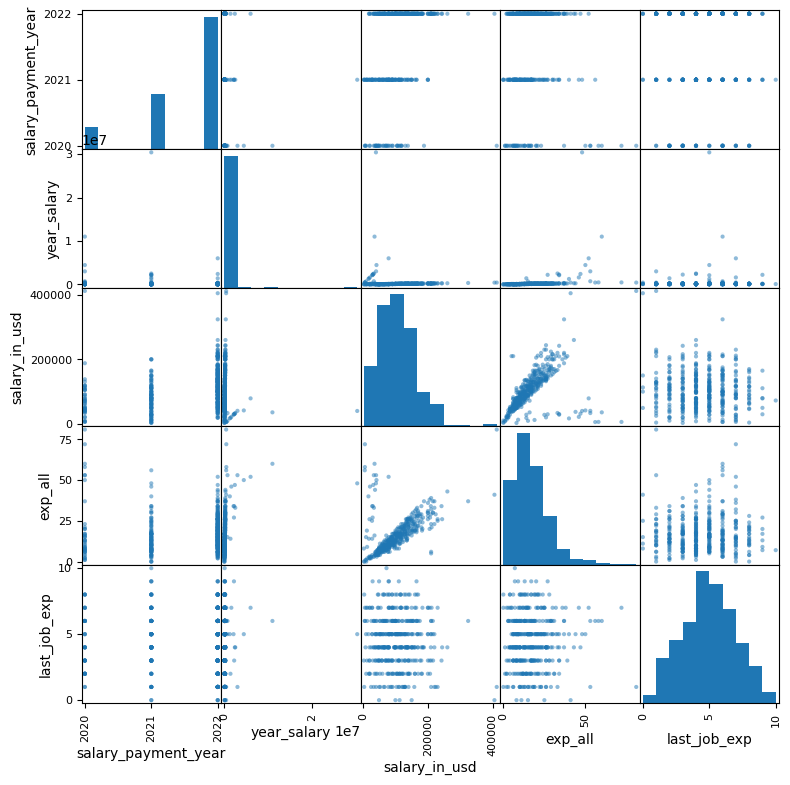

In [ ]:
pd.plotting.scatter_matrix(df, figsize=(9, 9))

Исходя из полученной визуализации данных можно выявить некоторые взаимосвязи. В промежутке с 2020 по 2022 наблюдается увеличение количества опыта работы у сотрудников исходя их выплат заработных плат (диаграмма "exp_all" и "salary_payment_year"). Также наблюдается некоторая тенденция повышения заплат у людей, имеющих больший опыт работы (диаграмма "exp_all" и "year_salary", "exp_all" и "salary_in_usd"). Опыт работы на последнем рабочем месте не особо влияет на размер заплаты, однако имеются данные о получении относительно больших зарплат при практически нулевом значении опыта работы на прошлам месте работы (диаграмма "last_job_exp" и "year_salary", "last_job_exp" и "salary_in_usd"). Чем выше общий опыт работы, тем выше значение опыта работы на прошлом рабчем месте (диаграмма "last_job_exp" и "exp_all").

Таким образом, из визуализированных данных в виде матрицы диаграмм можно выявить некоторые зависимости между переменными.

###4.Исследование корреляцией

Корреляция может быть измерена с помощью коэффициента корреляции, такого как коэффициент Пирсона. Для исследования взаимосвязей между переменными составляется матрица корреляций между всеми числовыми столбцами таблицы.

In [ ]:
df.corr() # матрица корреляций между всеми числовыми столбцами таблицы

<ipython-input-28-066721d0b66d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr() # матрица корреляций между всеми числовыми столбцами таблицы


,salary_payment_year,year_salary,salary_in_usd,exp_all,last_job_exp
salary_payment_year,1.000000,-0.096426,0.333551,0.030212,-0.010253
year_salary,-0.096426,1.000000,-0.092159,0.317241,0.033649
salary_in_usd,0.333551,-0.092159,1.000000,0.495942,-0.077570
exp_all,0.030212,0.317241,0.495942,1.000000,0.008930
last_job_exp,-0.010253,0.033649,-0.077570,0.008930,1.000000


В местах, где корреляция отлична от нуля, наблюдается линейная взаимосвязь между переменными. В случае, если коэффициент корреляции равен 0, взаимосвязи либо нет, либо имеет сложный характер, зависит от нескольких переменных.

Для анализа данных производится округление до целого числа.

На основе полученной матрицы коэффициентов корреляции выявлена взаимосвязь между всем опытом работы и зарплатой в долларах.

Отсутствие взаимосвязи остальных параметров в случае данного датасета может свидетельствовать о наличии сложных зависимостей между ними.

###5.Тепловая карта корреляции

<ipython-input-29-a8089bb2b0a7>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(),


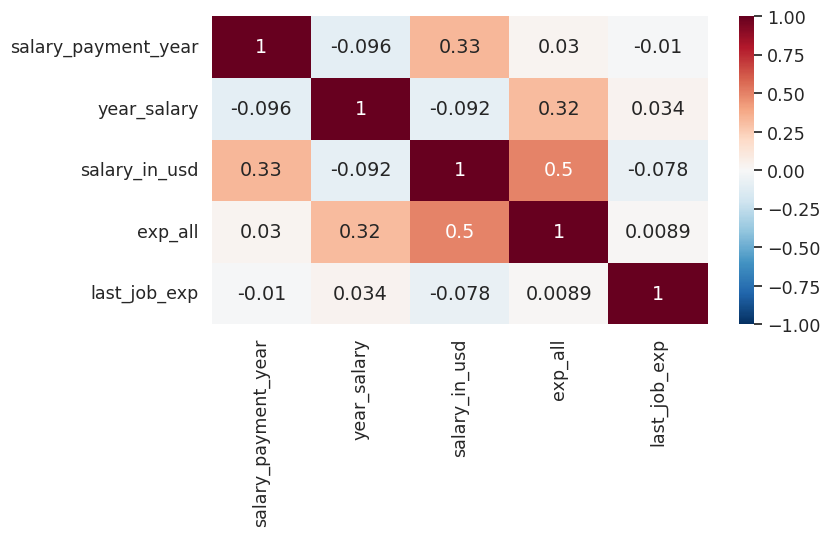

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.15)
plt.figure(figsize=(8,4))
sns.heatmap(
    df.corr(),
    cmap='RdBu_r', # задаёт цветовую схему
    annot=True, # рисует значения внутри ячеек
    vmin=-1, vmax=1); # указывает начало цветовых кодов от -1 до 1.

Анализ карты:
Самые высокие значения наблюдаются на пересечениях параметров с самими собой. Значения, ближайшие к 1, это пересечения "salary_in_usd" и "exp_all". Следующие после них по величине - salary_payment_year" и "salary_in_usd", "exp_all" и "year_salary". Остальные значения близки к нулю, что свидетельствует о сложной взаимосвязи параметров или об ее отсутствии как таковой.

###6.Постройте графики по заданию в варианте
**Задание 1 : Использовать seaborn. По группировке - work_year  и количество компаний каждого размера построить диаграмму, как в примере.**

Сначала производится группировка, дается имя столбцу счета, а затем производится построение гистограммы.

[Text(0.5, 1.0, 'Диаграмма количества компаний по размерам за каждый год'),
 Text(0.5, 0, 'Количество компаний'),
 Text(0, 0.5, 'Год')]

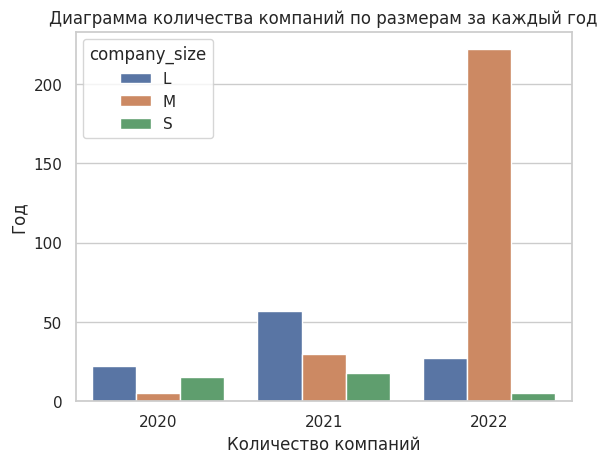

In [ ]:
import seaborn as sns

#группировка
g1 = df.groupby(['salary_payment_year', 'company_size'])['year_salary'].count()
df1 = g1.to_frame(name='count').reset_index()
sns.set(style='whitegrid')
sns.barplot(x='salary_payment_year', y='count', hue='company_size', data=df1).set(
    title='Диаграмма количества компаний по размерам за каждый год', xlabel='Количество компаний', ylabel='Год')

Анализ диаграммы:
По данным диаграммы количества компаний по размерам за каждый год можно сказать, что количество компаний каждого размера изменялось с течением времени. У компаний среднего размера за период с 2020 по 2022 года наблюдалось увеличение численности. Количество крупных предприятий сначала увеличилось, а затем уменьшилось. Число малого бизнеса сначала увеличилось, а затем упало. Также для каждого года можно выделить лидеров по численности. Для 2020 года - крупный бизнес, 2021 - тоже крупный, а для 2022 - средний. Аналогичным образом могут быть выделены отстающие данной отрасли и средние предприятия.

**Задание 2: Использовать pandas и plot. По сводной таблице (pivot_table) - отобразить среднюю зарплату в usd по должностям (job_title). Сделать линию красной, шириной 6 и отобразить маркеры в виде красных точек.**

Сначала производится посторение сводной таблицы, а затем создание диаграммы.

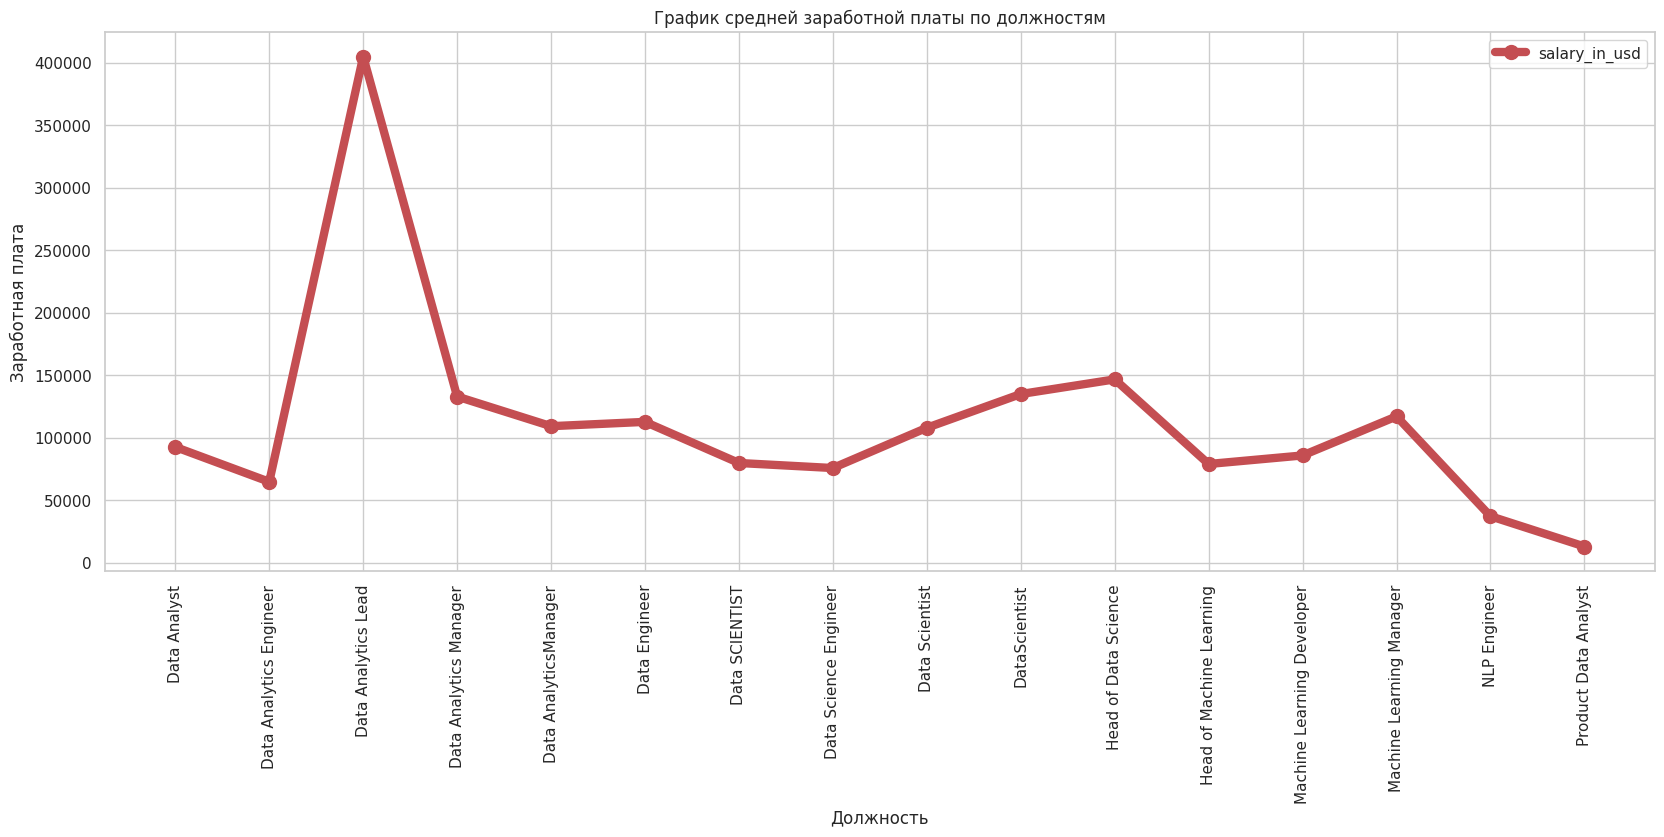

In [ ]:
data_pivot1 = df.pivot_table(index=['job_title'], values='salary_in_usd', aggfunc='mean')
data_pivot1.plot(title='График средней заработной платы по должностям', ylabel='Заработная плата',
                 xlabel='Должность', figsize=(20,7), color='r', marker='o', mec='r', lw = 6, ms = 10, rot=90, xticks=list(range(0,16))).set_facecolor('white')

Анализ диаграммы:
Исходя из визуализированных данных графика средней заработной платы по должностям можно сказать, что максимальная средняя зарплата по данным датасета принадлежит людям на должности Data Analytics Lead, а наименьшая NLP Engineer.

**Задание 3: Использовать matplotlib. Построить круговую диаграмму, которая отображает процент компаний каждого размера.**

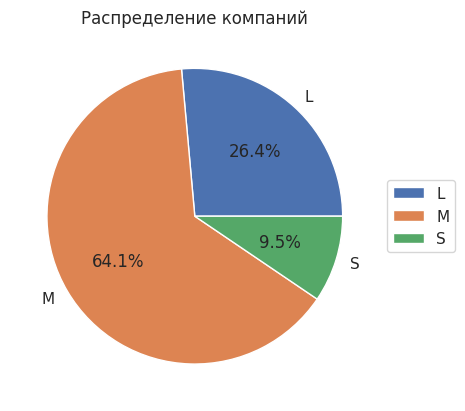

In [ ]:
import matplotlib.pyplot as plt

g1 = df.groupby('company_size')['year_salary'].count()
df1 = g1.to_frame(name='count').reset_index() #применяется ресет индексов иначе столбец "company_size" станет индексным
fig1, ax1 = plt.subplots()
ax1.pie(df1['count'], labels = df1['company_size'], autopct='%1.1f%%')
ax1.legend(loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# plt.setp(autotexts, size=8, weight="bold")

ax1.set_title("Распределение компаний")
plt.show()

Анализ диаграммы:
На основе диаграммы распределения компаний можно сказать, что в записях датафрейма преимущественно большое количество составляют компании среднего размера. Среднее положение принадлежит крупным компаниям. А наименьшее число записей составляют компании малого размера.

**Вывод**

В процессе выполнения работы была осуществлена предварительная обработка данных csv-файла, выявлены и устранены проблемы в этих данных. Были изучены связи между признаками двумерного набора данных, а также методы визуализации данных.

В процессе выполнения работы возникали проблемы с построением диаграмм в виде установки сетки, заголовка диаграммы и подписей по осям. Данные проблемы были решены при помощи передачи дополнительных параметров в аргументах функций создания диаграмм или применения дополнительных методов установки данных параметров отображения.

Данные датасета позволяют анализировать зарплаты различных специалистов в различных компаниях и получать данные основанные на их предыдущем опыте.

Исходя из матрицы диаграмм расеяния можно выявить некоторые взаимосвязи. В промежутке с 2020 по 2022 наблюдается увеличение количества опыта работы у сотрудников исходя их выплат заработных плат. Также наблюдается некоторая тенденция повышения заплат у людей, имеющих больший опыт работы. Опыт работы на последнем рабочем месте не особо влияет на размер заплаты, однако имеются данные о получении относительно больших зарплат при практически нулевом значении опыта работы на прошлам месте работы. Чем выше общий опыт работы, тем выше значение опыта работы на прошлом рабчем месте.

На основе полученной матрицы коэффициентов корреляции выявлена взаимосвязь между всем опытом работы и зарплатой в долларах.

При анализе тепловой карты были выявлены некоторые факты. Самые высокие значения наблюдаются на пересечениях параметров с самими собой. Значения, ближайшие к 1, это пересечения "salary_in_usd" и "exp_all". Следующие после них по величине - salary_payment_year" и "salary_in_usd", "exp_all" и "year_salary". Остальные значения близки к нулю, что свидетельствует о сложной взаимосвязи параметров или об ее отсутствии как таковой.

По данным диаграммы количества компаний по размерам за каждый год можно сказать, что количество компаний каждого размера изменялось с течением времени. У компаний среднего размера за период с 2020 по 2022 года наблюдалось увеличение численности. Количество крупных предприятий сначала увеличилось, а затем уменьшилось. Число малого бизнеса сначала увеличилось, а затем упало. Также для каждого года можно выделить лидеров по численности. Для 2020 года - крупный бизнес, 2021 - тоже крупный, а для 2022 - средний. Аналогичным образом могут быть выделены отстающие данной отрасли и средние предприятия.

Исходя из визуализированных данных графика средней заработной платы по должностям можно сказать, что максимальная средняя зарплата по данным датасета принадлежит людям на должности Data Analytics Lead, а наименьшая NLP Engineer.

На основе диаграммы распределения компаний можно сказать, что в записях датафрейма преимущественно большое количество составляют компании среднего размера. Среднее положение принадлежит крупным компаниям. А наименьшее число записей составляют компании малого размера.

###7.Дополнительные задания.
**Задание 1: Построить диаграмму типа hexbin для параметров опыт работы и годовая зп, опыт работы и зарплата в далларах.**

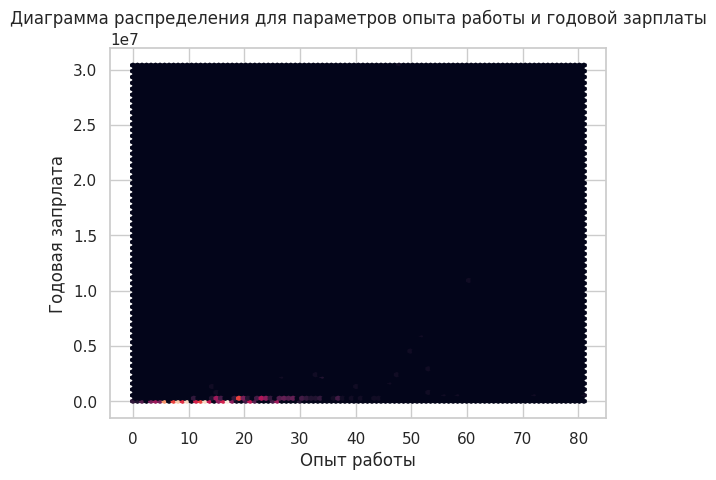

In [ ]:
plt.hexbin(df['exp_all'], df['year_salary'], label='fnb')
plt.title('Диаграмма распределения для параметров опыта работы и годовой зарплаты')
plt.xlabel('Опыт работы')
plt.ylabel('Годовая запрлата')
plt.show()

Анализ диаграммы:
На основе полученной визуализации данных сложно заметить тенденцию к росту зарплаты при большем опыте. Данная диаграмма сложна для анализа, однако можно видеть небольшую тенденцию к увеличению. Большая часть данных в датасете приходится на вакансии с опытом работы от 0 до 20.

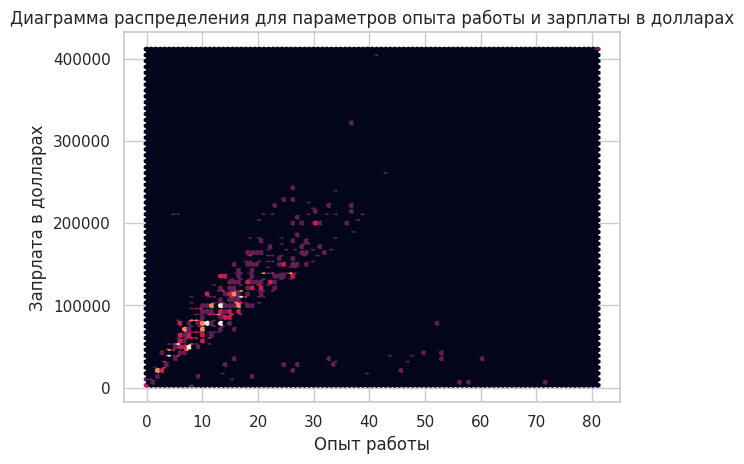

In [ ]:
plt.hexbin(df['exp_all'], df['salary_in_usd'])
plt.title('Диаграмма распределения для параметров опыта работы и зарплаты в долларах')
plt.xlabel('Опыт работы')
plt.ylabel('Запрлата в долларах')
plt.show()

Анализ диаграммы:
По визуализированным данным зависимости зарплаты в долларах и опыта работы можно судить о распределении зарплат в связи с величиной опыта работы. На диаграмме ярко показана зависимость: при наличии большего опыта работы зарплата в долларах будет больше.

**Задание 2: Построить матрицу диаграмм рассеяния при помощи библиотеки Seaborn и точки обозначать различными цветами по параметру "employment_type".**

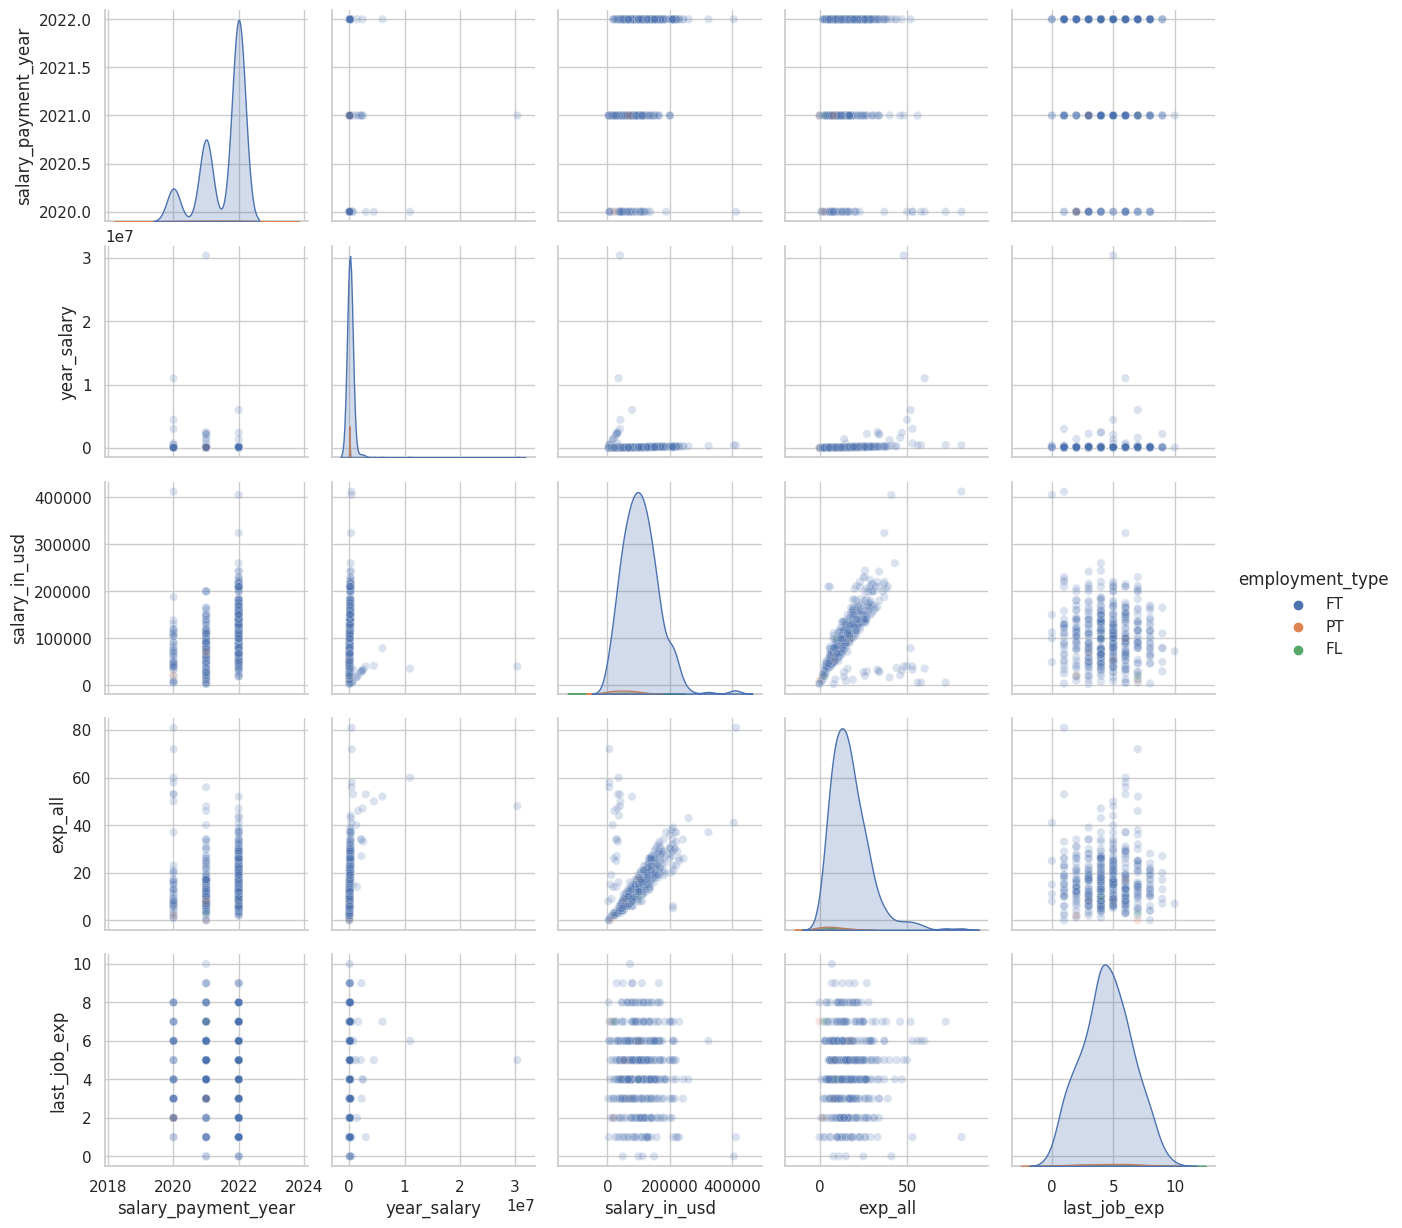

In [ ]:
sns.pairplot(df, diag_kind='kde', plot_kws={'alpha': 0.2}, hue='employment_type')

Так как в датасете основные данные содержатся о работе с типом занятости "FT", на диаграммах почти не отображаются другие типы.

Исходя из полученной визуализации данных можно выявить некоторые взаимосвязи. В промежутке с 2020 по 2022 наблюдается увеличение количества опыта работы у сотрудников исходя их выплат заработных плат (диаграмма "exp_all" и "salary_payment_year"). Также наблюдается некоторая тенденция повышения заплат у людей, имеющих больший опыт работы (диаграмма "exp_all" и "year_salary", "exp_all" и "salary_in_usd"). Опыт работы на последнем рабочем месте не особо влияет на размер заплаты, однако имеются данные о получении относительно больших зарплат при практически нулевом значении опыта работы на прошлам месте работы (диаграмма "last_job_exp" и "year_salary", "last_job_exp" и "salary_in_usd"). Чем выше общий опыт работы, тем выше значение опыта работы на прошлом рабчем месте (диаграмма "last_job_exp" и "exp_all").

Данная визуализация описывает взаимосвязи между параметрами, демонстрируя зависимость между ними. Также отображает распределение взаимосвязей параметров по типу занятости, где каждый имеет свой цвет отображаемых данных.

**Задание 3: Построить диаграмму boxplot для любого параметра.**

[Text(0.5, 1.0, 'Диаграмма размаха зарплат в долларах по годам'),
 Text(0.5, 0, 'Год'),
 Text(0, 0.5, 'Зарплата в долларах')]

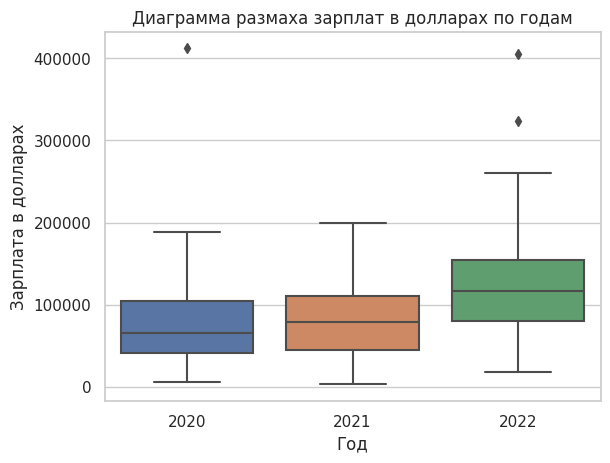

In [ ]:
sns.boxplot(x='salary_payment_year', y='salary_in_usd', data=df).set(title='Диаграмма размаха зарплат в долларах по годам', xlabel='Год', ylabel='Зарплата в долларах')

Анализ диагарммы:
Данная визуализация данных показывает распределение данных о зарплатах в долларах по годам, где можно увидеть медианное значение, верхний и нижний квартили, верхнюю и нижнюю границы значений, выброс или точку единичных данных. По данным полученной диаграммы можно сказать, что зарплаты в период с 2020 по 2022 года увеличивались, особенно значительно рост виден в 2022 году. Верхняя граница зарплат в 2022 году сильно повысилась, а также вырос размах между граничными значениями. В этом же году нижняя граница зарплаты повысилась. В 2021 году по сравнению в 2020 появились зарплаты и ниже, а также произошло повышение верхней границы, что немного повысило медианное значение.